# Подключаем библиотеки

In [1]:
from sklearn.datasets import load_wine
import pandas as pd

data = load_wine()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
print(df.info())
df.head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
 13  targe

<bound method NDFrame.head of      alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0      14.23        1.71  2.43               15.6      127.0           2.80   
1      13.20        1.78  2.14               11.2      100.0           2.65   
2      13.16        2.36  2.67               18.6      101.0           2.80   
3      14.37        1.95  2.50               16.8      113.0           3.85   
4      13.24        2.59  2.87               21.0      118.0           2.80   
..       ...         ...   ...                ...        ...            ...   
173    13.71        5.65  2.45               20.5       95.0           1.68   
174    13.40        3.91  2.48               23.0      102.0           1.80   
175    13.27        4.28  2.26               20.0      120.0           1.59   
176    13.17        2.59  2.37               20.0      120.0           1.65   
177    14.13        4.10  2.74               24.5       96.0           2.05   

     flavanoids  nonf

# Зависимость различных параметров вина у разных групп

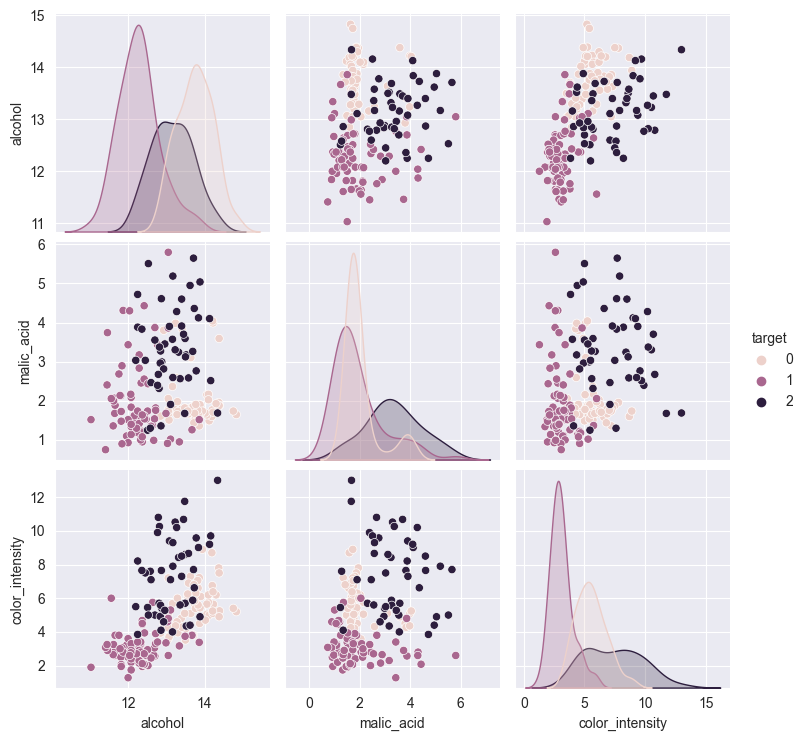

In [2]:
import seaborn as sns
sns.pairplot(df[['alcohol','malic_acid','color_intensity','target']],hue='target')

# Разделяем выборку на используюмую для обучения и для проверки

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.20, random_state=42
)


In [4]:
print(
    f'Разделение на выборки:\n'
    f'training: {(100 * len(X_train) / len(data.target)):.2f} %\n'
    f'testing: {(100 * len(X_test) / len(data.target)):.2f} %\n'

)

Разделение на выборки:
training: 79.78 %
testing: 20.22 %



# Подключаем библиотеку и обучаем

In [5]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train, y_train)
print("intercept")
print(model.intercept_)
print("коэффициент регрессии")
print(model.coef_)

intercept
3.292824701981454
коэффициент регрессии
[-1.09279520e-01  4.33504334e-02 -2.04972602e-01  4.40282611e-02
  3.77391056e-05  1.52212162e-01 -3.53372029e-01 -3.20200804e-01
  1.75960551e-02  7.68233961e-02 -9.13449280e-02 -2.81542501e-01
 -6.97267143e-04]


# Сравниваем ожидаемое значение после обучения и реальные

In [6]:
y_pred = model.predict(X_test)
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,0,0.169481
1,0,0.307092
2,2,1.491986
3,0,0.225886
4,1,0.932230
5,0,0.126509
6,1,0.960782
7,2,1.936936
8,1,0.473391
9,2,1.402255


In [7]:
#for i in range(len(y_pred)):
 #    y_pred[i] = round(y_pred[i])
#df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
#df

In [8]:
print('Training data r-squared: ', model.score(X_train, y_train))
print('Test data r-squared: ', model.score(X_test, y_test))

Training data r-squared:  0.9029347422931708
Test data r-squared:  0.8825140263270388


In [9]:
pd.DataFrame(data=model.coef_, index=data.feature_names, columns=['coef'])

,coef
alcohol,-0.109280
malic_acid,0.043350
ash,-0.204973
alcalinity_of_ash,0.044028
magnesium,0.000038
total_phenols,0.152212
flavanoids,-0.353372
nonflavanoid_phenols,-0.320201
proanthocyanins,0.017596
color_intensity,0.076823


In [10]:
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

ValueError: Classification metrics can't handle a mix of multiclass and continuous targets